**1. Temporal Deviation Evolution LA-Bound pH 5**

Below we show the temporal deviation evolution for LA-Bound pH 5 at each time of point: 0.1 ns, 1.0 ns, 5.0 ns, and 10.0 ns with the standard error bar being highlighted in red.

For this analysis the monomers are averaged, therefore each monomer has 1128 residues. Due to mapping issues with building the PDBs, the monomers have to be adjusted when plotted by shifting the residues towards the right. 

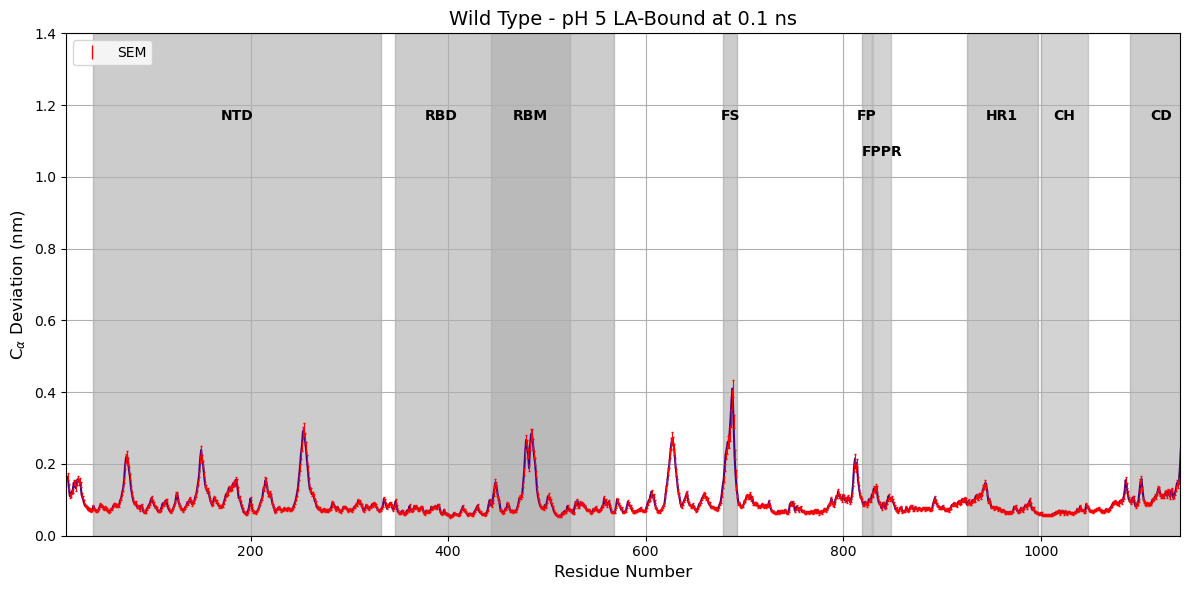

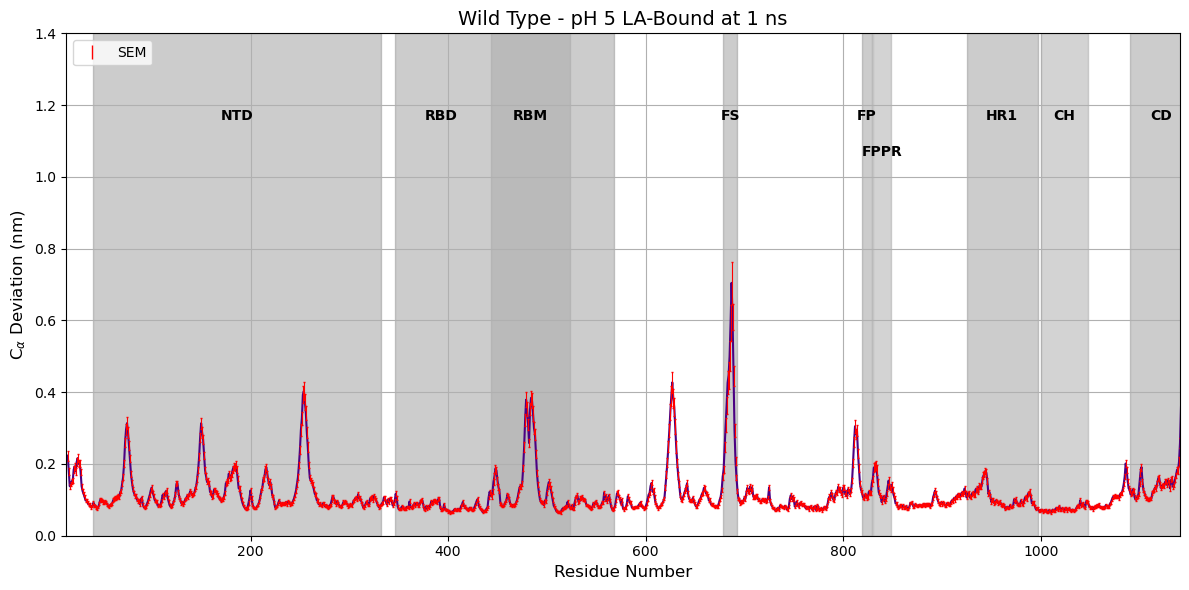

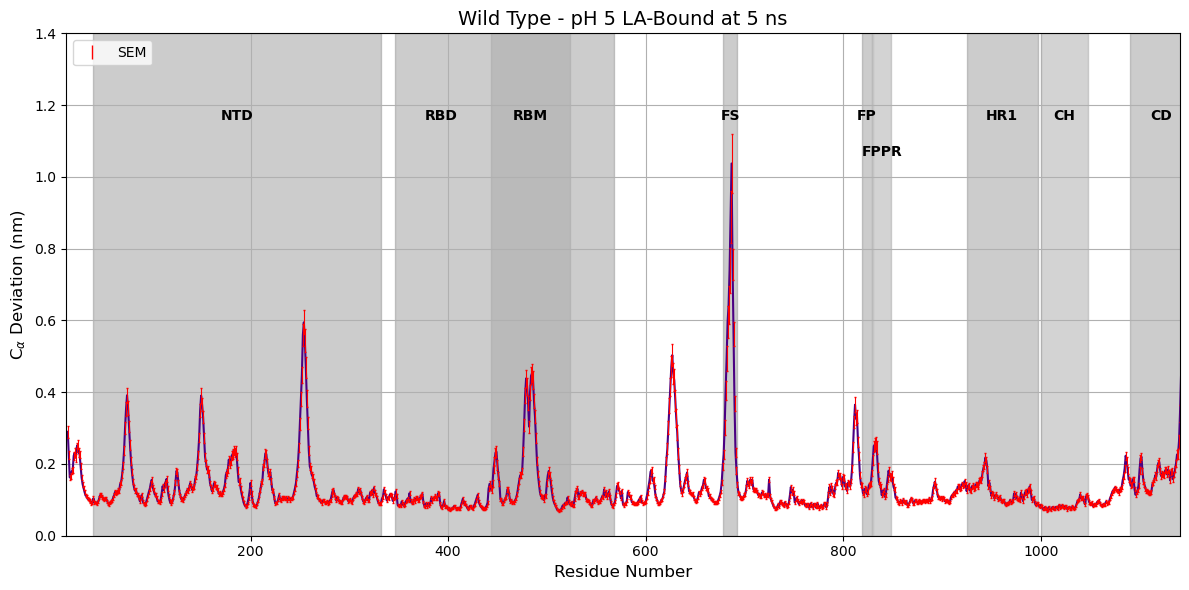

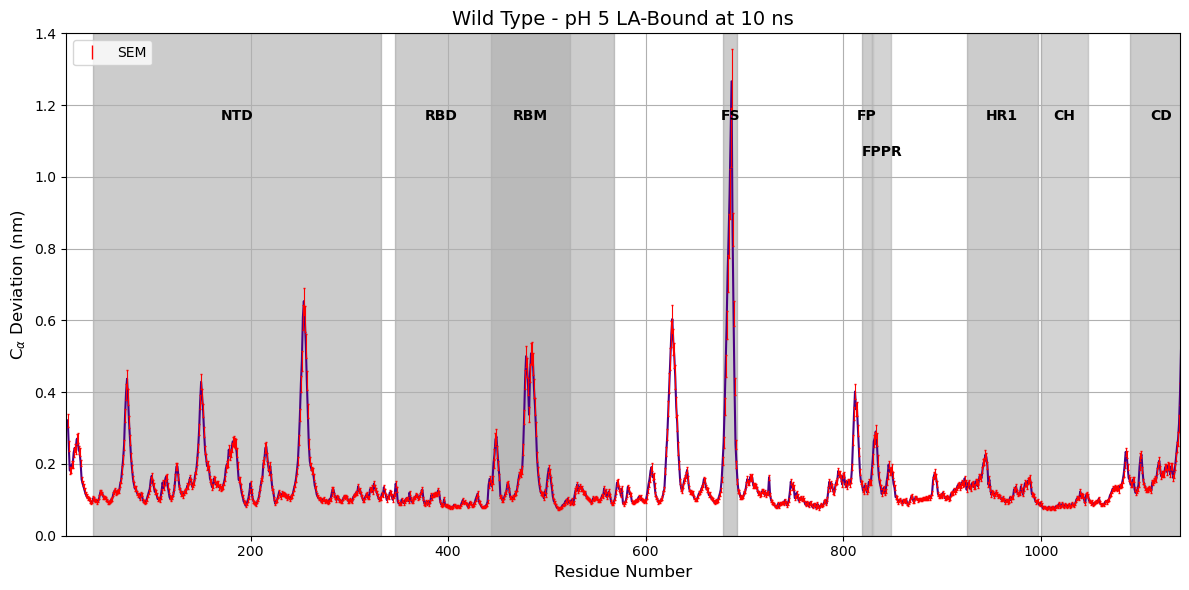

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Load the data for each time point and process it for SEM
def load_data_with_sem(file_path, residues_per_monomer=1128):
    data = pd.read_csv(file_path, delim_whitespace=True, skiprows=4, usecols=[0, 1, 4], names=['CA', 'CA Deviation', 'SEM'])
    
    # Calculate the average across the three monomers (A, B, C)
    avg_ca_deviation = data['CA Deviation'].values.reshape(-1, residues_per_monomer).mean(axis=0)
    avg_sem = data['SEM'].values.reshape(-1, residues_per_monomer).mean(axis=0)

    return avg_ca_deviation, avg_sem

# Define the domain regions
regions = [
    (28, 319, 'NTD'),
    (333, 555, 'RBD'),
    (430, 510, 'RBM'),
    (665, 680, 'FS'),
    (806, 816, 'FP'),
    (817, 835, 'FPPR'),
    (912, 984, 'HR1'),
    (987, 1035, 'CH'),
    (1077, 1141, 'CD')
]

def add_domain_regions(ax):
    for start, end, label in regions:
        if label in ['RBM', 'FPPR', 'CH']:
            ax.axvspan(start+13, end+13, color='darkgray', alpha=0.5)
        else:
            ax.axvspan(start+13, end+13, color='gray', alpha=0.4)

    for start, end, label in regions:
        mid = (start + end) / 2 + 13
        if label == 'RBD':
            ax.text(start + 30 + 13, 1.15, label, ha='left', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
        else:
            ax.text(mid, 1.15 if label != 'FPPR' else 1.05, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')

# Function to create the plot averaged across monomers with SEM
def plot_avg_with_sem(residue_numbers, avg_ca_deviation, avg_sem, time_point, output_suffix):
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x=residue_numbers, y=avg_ca_deviation, color='#4b0082', label=f'Time Point: {time_point}')
    
    # Add error bars for SEM
    plt.errorbar(residue_numbers, avg_ca_deviation, yerr=avg_sem, fmt='none', ecolor='red', elinewidth=0.8, capsize=0.8)
    
    # Add the domain regions and labels
    add_domain_regions(ax)
    
    # Create a custom legend handle for SEM
    sem_legend = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='SEM')

    plt.title(f'Wild Type - pH 5 LA-Bound at {time_point}', fontsize=14)
    plt.xlabel('Residue Number', fontsize=12)
    plt.ylabel('C$_{{\\alpha}}$ Deviation (nm)', fontsize=12)
    plt.xlim([13, 1141])
    plt.ylim([0, 1.4])
    plt.grid(True)
    plt.legend(handles=[sem_legend], loc='upper left')
    plt.tight_layout()
    plt.show()

# File paths for each time point
file_paths = {
    '0.1 ns': 'SD_100', 
    '1 ns': 'SD_1000',   
    '5 ns': 'SD_5000',  
    '10 ns': 'SD_10000'   
}

# Loop through each time point
for time_point, file_path in file_paths.items():
    avg_ca_deviation, avg_sem = load_data_with_sem(file_path)

    residue_numbers = pd.Series(range(1, len(avg_ca_deviation) + 1)) + 14 #shift plot 14 residues to the right due to data mapping error

    # Plot averaged across monomers with SEM
    plot_avg_with_sem(residue_numbers, avg_ca_deviation, avg_sem, time_point, 'averaged')




**1.1 Temporal Deviation Evolution Summary**

Below we show the temporal deviation evolution summary where each time point is shown on the same figure. The data first must be processed for each time point and then visualised. The data must be processed seperately for each time point. You must manually alter the data file for it to be processed. I.e. change the file path from 10 ns to 1.0 ns

In [6]:
import pandas as pd
import numpy as np

# Load the data from the text file, skipping the first 4 header lines
file_path = 'SD_100'
data = pd.read_csv(file_path, delim_whitespace=True, skiprows=4, usecols=[0, 1], names=['CA atom', 'Average RMSD'])

# Calculate the number of residues per monomer
residues_per_monomer = 1128

# Initialize a list to store the average RMSD for each residue
average_rmsd_per_residue = []

# Loop over each residue index
for i in range(residues_per_monomer):
    # Calculate the indices for the corresponding CA atoms in the three monomers
    indices = [i, i + residues_per_monomer, i + 2 * residues_per_monomer]
    
    # Calculate the average RMSD for this residue across the three monomers
    average_rmsd = data.loc[indices, 'Average RMSD'].mean()
    
    # Append the result to the list
    average_rmsd_per_residue.append(average_rmsd)

# Prepare the data for plotting
residue_numbers = np.arange(1, residues_per_monomer + 1)   # Shift by 13 residues

# Create a DataFrame for easy plotting
plot_data = pd.DataFrame({
    'Residue Number': residue_numbers,
    'CA Deviation': average_rmsd_per_residue
})

# Save the prepared data to a new CSV file
output_file_path = '0.1ns'
plot_data.to_csv(output_file_path, index=False, header=False)

print("Data preparation complete. You can now use this data for plotting.")



Data preparation complete. You can now use this data for plotting.


**Now that the data has been processed iteratively for every time point (0.1, 1.0 ns, 5.0 ns, 10.0 ns), this can be plotted on a single plot:**

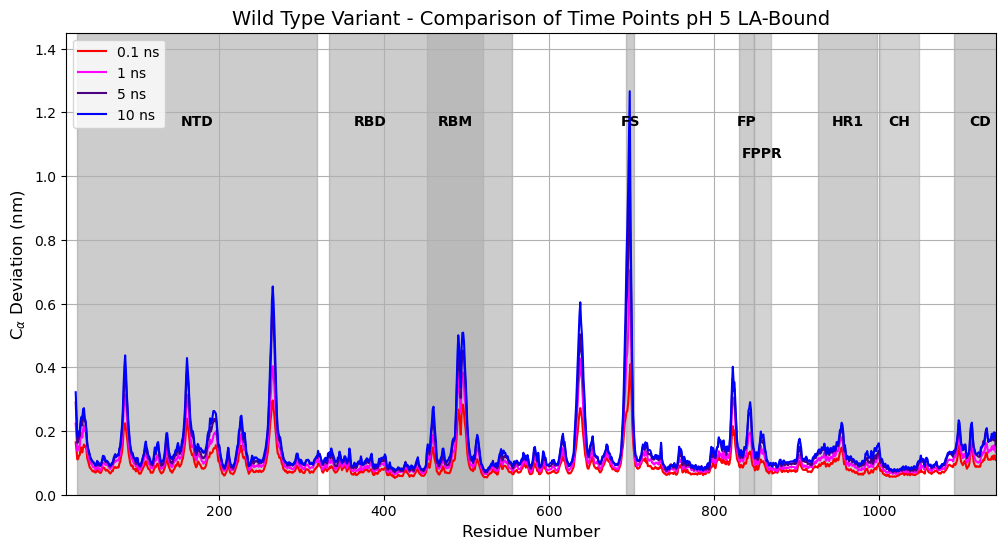

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data for each time point
data_100 = pd.read_csv('0.1ns', header=None, names=['Residue Number', 'CA Deviation'])
data_1000 = pd.read_csv('1ns', header=None, names=['Residue Number', 'CA Deviation'])
data_5000 = pd.read_csv('5ns', header=None, names=['Residue Number', 'CA Deviation'])
data_10000 = pd.read_csv('10ns', header=None, names=['Residue Number', 'CA Deviation'])

# Add a column for the time points
data_100['Time Point'] = '0.1 ns'
data_1000['Time Point'] = '1 ns'
data_5000['Time Point'] = '5 ns'
data_10000['Time Point'] = '10 ns'

# Shift the residue numbers by 14 residues
data_100['Residue Number'] += 25
data_1000['Residue Number'] += 25
data_5000['Residue Number'] += 25
data_10000['Residue Number'] += 25

# Combine all data into a single DataFrame
combined_data = pd.concat([data_100, data_1000, data_5000, data_10000])

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='Residue Number', y='CA Deviation', hue='Time Point', palette=['#ff0000', '#ff00ff', '#4b0082', '#0000ff'])

# Add titles and labels
plt.title('Wild Type Variant - Comparison of Time Points pH 5 LA-Bound', fontsize=14)
plt.xlabel('Residue Number', fontsize=12)
plt.ylabel('C$_{\\alpha}$ Deviation (nm)', fontsize=12)

# Highlight specific regions to show the domains of the spike
regions = [
    (14, 305, 'NTD'),
    (319, 541, 'RBD'),
    (438, 506, 'RBM'),
    (680, 689, 'FS'),
    (816, 835, 'FP'),
    (835, 855, 'FPPR'),
    (912, 984, 'HR1'),
    (987, 1035, 'CH'),
    (1077, 1141, 'CD')
]

# Shading regions
for start, end, label in regions:
    if label in ['RBM', 'FPPR', 'CH']:
        plt.axvspan(start + 14, end + 14, color='darkgray', alpha=0.5)
    else:
        plt.axvspan(start + 14, end + 14, color='gray', alpha=0.4)

# Adding text labels
for start, end, label in regions:
    if label == 'RBD':
        plt.text(start + 30 + 14, 1.15, label, ha='left', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
    elif label == 'RBM':
        plt.text((start + end) / 2 + 14, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
    elif label == 'FP':
        plt.text((start + end) / 2 + 14, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
    elif label == 'FPPR':
        plt.text((start + end) / 2 + 14, 1.05, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
    elif label == 'CH':
        plt.text((start + end) / 2 + 14, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')
    else:
        plt.text((start + end) / 2 + 14, 1.15, label, ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=0, color='black')

# Set axis limits
plt.xlim([14, 1142])  # Adjusted for the 14-residue shift
plt.ylim([0, 1.45])

# Add grid
plt.grid(True)

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Display the plot
plt.show()